## Problema 1: Banking - Risk Management

Queremos analizar el riesgo de los préstamos por edades. ¿Qué es más seguro: prestarle dinero a los jovenes o a los mayores?

> Realizado por Jorge Vila Tomás.

### Importación de las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Carga de los datos

In [2]:
risk = pd.read_csv("loansRisk.csv")
print("Los datos que hemos importado tienen {} filas y {} columnas.".format(*risk.shape))
risk.head()

Los datos que hemos importado tienen 15 filas y 4 columnas.


,Age group,Total Loans,Bad Loans,Good Loans
0,21,9,2,7
1,24,310,14,296
2,27,511,20,491
3,30,4000,172,3828
4,33,4568,169,4399


### Salud de los datos

Antes de realizar cualquier análisis es conveniente comprobar la salud de los datos: cantidad de datos faltantes, outliers, cantidad de datos de cada clase que queremos estudiar, etc.

In [3]:
risk.isna().sum()

Age group      0
Total Loans    0
Bad Loans      0
Good Loans     0
dtype: int64

In [4]:
risk.describe()

,Age group,Total Loans,Bad Loans,Good Loans
count,15.000000,15.000000,15.000000,15.000000
mean,43.133333,4054.400000,101.600000,3952.800000
std,15.819819,3292.557512,86.292526,3214.334617
min,21.000000,6.000000,0.000000,6.000000
25%,31.500000,649.500000,17.000000,635.000000
50%,42.000000,4000.000000,84.000000,3936.000000
75%,52.500000,6800.000000,180.000000,6682.000000
max,80.000000,9000.000000,216.000000,8784.000000


In [5]:
risk[["Age group", "Total Loans"]]

,Age group,Total Loans
0,21,9
1,24,310
2,27,511
3,30,4000
4,33,4568
5,36,5698
6,39,8209
7,42,8117
8,45,9000
9,48,7600


El primer y el último grupos de edad (21 y 80 años) tienen muy pocas muestras en comparación con el resto de grupos, así que podría tener sentido eliminar estas entradas y quedarnos únicamente con las que tienen suficientes muestras.

In [6]:
risk = risk.iloc[1:-1,:]
risk

,Age group,Total Loans,Bad Loans,Good Loans
1,24,310,14,296
2,27,511,20,491
3,30,4000,172,3828
4,33,4568,169,4399
5,36,5698,188,5510
6,39,8209,197,8012
7,42,8117,211,7906
8,45,9000,216,8784
9,48,7600,152,7448
10,51,6000,84,5916


### Creación de variables

Puede ser interesante crear dos variables nuevas que nos indiquen directamente el porcentaje de buenos y malos prestamos. Este tipo de variables *de proporción* son muy útiles para comparar justamente grupos con diferente cantidad de muestras. Podemos calcularlo muy fácilmente a partir de los datos que tenemos:

In [7]:
risk["Bad Loans (%)"] = risk["Bad Loans"]/risk["Total Loans"]
risk["Good Loans (%)"] = risk["Good Loans"]/risk["Total Loans"]

### Representación de los datos

Para responder a la pregunta que se nos plantea en el enunciado, ¿Qué es más seguro: prestarle dinero a los jovenes o a los mayores?, vamos a representar tanto la cantidad como la proporción de prestamos que han ido mal y los que han ido bien. Estas figuras deberían servirnos para extraer las conclusiones necesarias.

> Representamos tanto la cantidad como la proporción para manifestar la utilidad de utilizar la proporción en lugar de la cantidad *raw*.

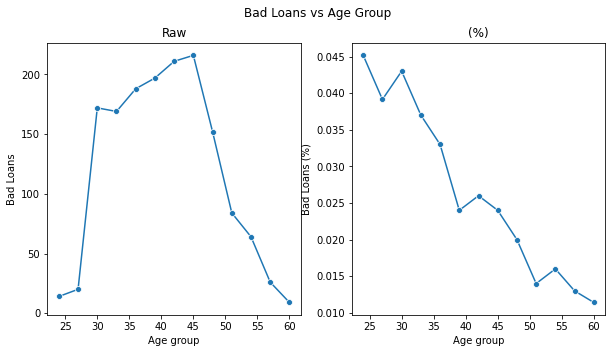

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=risk, x="Age group", y="Bad Loans", marker="o")
plt.title("Raw")
plt.subplot(1,2,2)
sns.lineplot(data=risk, x="Age group", y="Bad Loans (%)", marker="o")
plt.title("(%)")
plt.suptitle("Bad Loans vs Age Group")
plt.show()

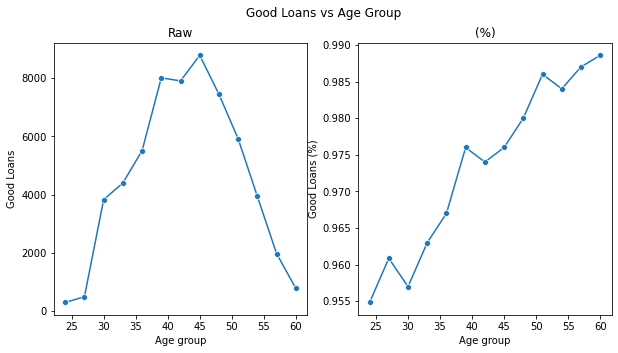

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=risk, x="Age group", y="Good Loans", marker="o")
plt.title("Raw")
plt.subplot(1,2,2)
sns.lineplot(data=risk, x="Age group", y="Good Loans (%)", marker="o")
plt.title("(%)")
plt.suptitle("Good Loans vs Age Group")
plt.show()

### Conclusiones

Como podemos ver, utilizar la variable percentual es muy importante para poder extraer las conclusiones adecuadas.

A partir de estas figuras vemos que hay cierta tendencia que indica que los prestamos a la gente mayor tienen menor riesgo que los prestamos a la gente joven.